In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout


In [1]:
# cifar=tf.keras.datasets.cifar10
# (xtrain,ytrain),(xtest,ytest)=cifar.load_data()
import pandas as pd
train_data=pd.read_csv('LP-IV-datasets/CIFR(Ass2&3)/train_data.csv')
xtrain=train_data.drop('label',axis=1).values
ytrain=train_data['label']

test_data=pd.read_csv('LP-IV-datasets/CIFR(Ass2&3)/test_data.csv')
xtest=test_data.drop('label',axis=1).values
ytest=test_data['label']

xtrain=xtrain.reshape(xtrain.shape[0],32,32,3)
xtest=xtest.reshape(xtest.shape[0],32,32,3)

In [3]:
xtrain=xtrain/255.0
xtest=xtest/255.0

In [5]:
model=Sequential([
    Conv2D(32,kernel_size=(3,3),input_shape=(32,32,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32,kernel_size=(3,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64,kernel_size=(3,3)),
    Flatten(),
    Dense(128,activation="relu"),
    Dropout(0.3),
    Dense(10,activation="softmax")
    
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [6]:
model.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",metrics=['accuracy'])
history=model.fit(xtrain,ytrain,epochs=11,validation_data=(xtest,ytest))

Epoch 1/11
1563/1563 [==============================] - 45s 28ms/step - loss: 1.9280 - accuracy: 0.3012 - val_loss: 1.7710 - val_accuracy: 0.3715
Epoch 2/11
1563/1563 [==============================] - 42s 27ms/step - loss: 1.6277 - accuracy: 0.4200 - val_loss: 1.5509 - val_accuracy: 0.4543
Epoch 3/11
1563/1563 [==============================] - 42s 27ms/step - loss: 1.4715 - accuracy: 0.4754 - val_loss: 1.3568 - val_accuracy: 0.5169
Epoch 4/11
1563/1563 [==============================] - 42s 27ms/step - loss: 1.3812 - accuracy: 0.5122 - val_loss: 1.2895 - val_accuracy: 0.5425
Epoch 5/11
1563/1563 [==============================] - 42s 27ms/step - loss: 1.3153 - accuracy: 0.5370 - val_loss: 1.2508 - val_accuracy: 0.5570
Epoch 6/11
1563/1563 [==============================] - 45s 29ms/step - loss: 1.2607 - accuracy: 0.5556 - val_loss: 1.1830 - val_accuracy: 0.5846
Epoch 7/11
1563/1563 [==============================] - 43s 28ms/step - loss: 1.2087 - accuracy: 0.5780 - val_loss: 1.1638 -

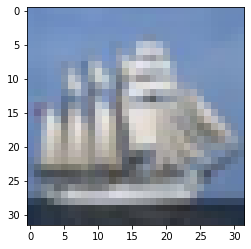

In [13]:
class_names=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
n=random.randint(0,9999)
image=xtest[n]
plt.imshow(image)
plt.show()

In [14]:
image=image.reshape(1,32,32,3)
pred=model.predict([image])
print("predicted class :",class_names[int(np.argmax(pred))])

1/1 [==============================] - 0s 40ms/step
predicted class : ship


In [17]:
from sklearn.metrics import classification_report
y_predict=model.predict(xtest)
y_pred=np.argmax(y_predict,axis=1)
y_true=ytest.flatten()
report=classification_report(y_true,y_pred,target_names=class_names)
print(report)

313/313 [==============================] - 4s 11ms/step
              precision    recall  f1-score   support

    airplane       0.62      0.72      0.67      1000
  automobile       0.64      0.83      0.72      1000
        bird       0.45      0.60      0.51      1000
         cat       0.47      0.41      0.44      1000
        deer       0.70      0.39      0.50      1000
         dog       0.62      0.42      0.50      1000
        frog       0.66      0.75      0.71      1000
       horse       0.72      0.68      0.70      1000
        ship       0.68      0.80      0.74      1000
       truck       0.73      0.60      0.66      1000

    accuracy                           0.62     10000
   macro avg       0.63      0.62      0.61     10000
weighted avg       0.63      0.62      0.61     10000

